# <CENTER> EVALUACIÓN

In [1]:
# Importación de librerias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report


# Cargamos models
lr = joblib.load('../artifacts/logistic_regression.pkl')
rf = joblib.load('../artifacts/random_forest_classifier.pkl')
xgb = joblib.load('../artifacts/xgboost_classifier.pkl')

# Cargamos data de test
test = pd.read_csv('../data/processed/test.csv', sep = ',')

X_test = test.drop('Class', axis=1)
y_test = test['Class']

## IMPORTANTE <br>
Para poder realizar el respectivo análisis de performance de cada modelo, tenemos que realizar sus predicciones correspondientes.

In [2]:
# Predecimos 
y_pred_lr = lr.predict(X_test)      # Predicciones para el modelo LogisticRegression
y_pred_rf = rf.predict(X_test)      # Predicciones para el modelo RandomForestClassifier
y_pred_xgb = xgb.predict(X_test)    # Predicciones para el modelo XGBoostClassifier

In [3]:
# Confusión Matrix
cm_lr = confusion_matrix(y_test, y_pred_lr)
cm_rf = confusion_matrix(y_test, y_pred_rf)
cm_xgb = confusion_matrix(y_test, y_pred_xgb)

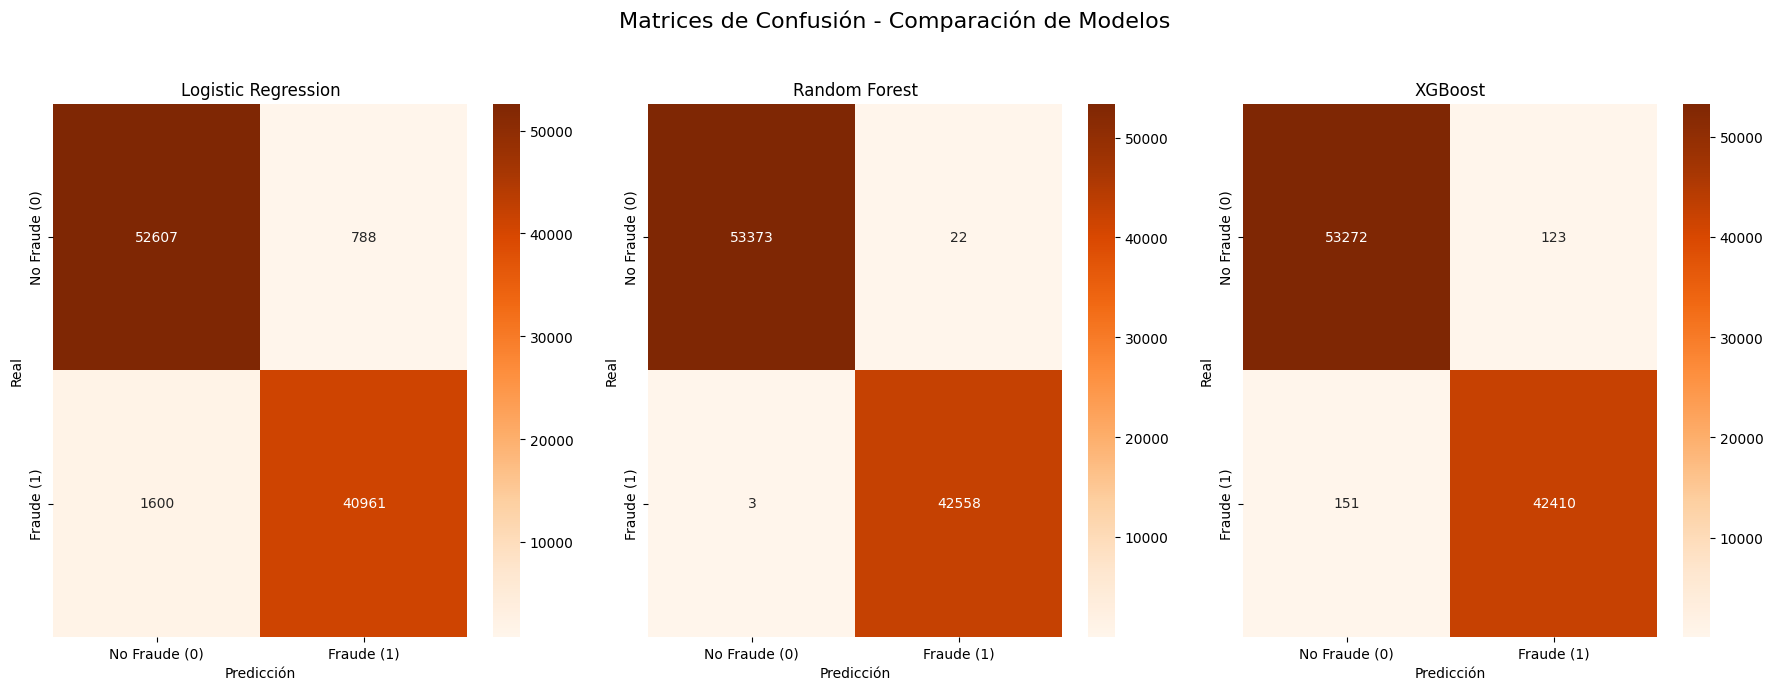

In [4]:
# Lista de matrices de confusión
cms = [cm_lr, cm_rf, cm_xgb]  
model_names = ['Logistic Regression', 'Random Forest', 'XGBoost']

# Crear subplots
fig, axes = plt.subplots(1, 3, figsize=(18, 7))

# Títulos de ejes
xticks = ['No Fraude (0)', 'Fraude (1)']
yticks = ['No Fraude (0)', 'Fraude (1)']

# Plot de cada matriz
for ax, cm, name in zip(axes, cms, model_names):
    sns.heatmap(cm, annot=True, fmt='d', cmap='Oranges',
                xticklabels=xticks, yticklabels=yticks, ax=ax)
    ax.set_title(name)
    ax.set_xlabel('Predicción')
    ax.set_ylabel('Real')

plt.suptitle('Matrices de Confusión - Comparación de Modelos', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

#### **Observaciones matriz de confusión:**
- **TN (Verdaderos Negativos)**: El modelo clasificó correctamente los casos que **no son fraude** (0).
- **FP (Falsos Positivos)**: El modelo predijo fraude, pero en realidad **no lo era**.
- **TP (Verdaderos Positivos)**: El modelo clasificó correctamente los casos de fraude (1).
- **FN (Falsos Negativos)**: El modelo predijo que **no era fraude**, pero en realidad **sí lo era**.

**Como podemos ver en las matrices, el modelo de RandomForestClassifier tuvo una mejor performance que LogisticRegression y XGBoostClassifier.**


## Clasification Report

In [5]:
# Calculamos el reporte de clasificación de cada modelo.
report_lr = classification_report(y_test, y_pred_lr, target_names=['Not Fraud', 'Fraud'])
report_rf = classification_report(y_test, y_pred_rf, target_names=['Not Fraud', 'Fraud'])
report_xgb = classification_report(y_test, y_pred_xgb, target_names=['Not Fraud', 'Fraud'])

In [6]:
print('######### Clasification report - LogisticRegression #########')
print(report_lr)
print('######### Clasification report - RandomForestClassifier #########')
print(report_rf)
print('######### Clasification report - XGBoostClassfier #########')
print(report_xgb)

######### Clasification report - LogisticRegression #########
              precision    recall  f1-score   support

   Not Fraud       0.97      0.99      0.98     53395
       Fraud       0.98      0.96      0.97     42561

    accuracy                           0.98     95956
   macro avg       0.98      0.97      0.97     95956
weighted avg       0.98      0.98      0.98     95956

######### Clasification report - RandomForestClassifier #########
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     53395
       Fraud       1.00      1.00      1.00     42561

    accuracy                           1.00     95956
   macro avg       1.00      1.00      1.00     95956
weighted avg       1.00      1.00      1.00     95956

######### Clasification report - XGBoostClassfier #########
              precision    recall  f1-score   support

   Not Fraud       1.00      1.00      1.00     53395
       Fraud       1.00      1.00      1.00     4

#### **Observaciones Reporte:**
- **Precisión:** Si queremos evitar causar a alguien por error, importa alta precisión.
- **Recall:** Si queremos detectar mayor cantidad de fraudes, importa un alto recall.
- **F1 Score:** Es útil cuando tenemos clases desbalanceadas y necesitamos equilibrar.